**Run the following two cells before you begin.**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz #to visualize decision trees

%matplotlib inline

df = pd.read_csv('cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [2]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [17]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
dot_data = tree.export_graphviz(dt, out_file=None, filled=True,
                                rounded=True, feature_names=features_response[:-1],
                                proportion=True, class_names=['Not defaulted', 'Defaulted'])

In [30]:
graph = graphviz.Source(dot_data) 
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [6]:
params_dict={'max_depth':[3,6,9,12],'n_estimators':[10,50,100,200]}
params_dict

{'max_depth': [3, 6, 9, 12], 'n_estimators': [10, 50, 100, 200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [31]:
from sklearn.model_selection import GridSearchCV
gds=GridSearchCV(rf,param_grid=params_dict,verbose=2,cv=4)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [32]:
gds.fit(X_train,y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.6s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.6s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.5s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.6s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .

[CV] ................... max_depth=12, n_estimators=100, total=   2.9s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   6.2s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   6.3s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   6.0s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   6.0s


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  2.0min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [33]:
gds_res=pd.DataFrame(gds.cv_results_)
gds_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.103224,0.002862,0.004747,0.000441,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.813426,0.813801,0.825802,0.820330,0.818340,0.005109,11
1,0.532569,0.009541,0.018700,0.001781,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.812863,0.810988,0.817926,0.811515,0.813323,0.002744,15
2,0.962434,0.008949,0.033910,0.000982,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.813238,0.808926,0.820551,0.807577,0.812573,0.005059,16
3,2.020122,0.082091,0.073794,0.010191,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.815301,0.811551,0.818676,0.813953,0.814870,0.002575,14
4,0.203705,0.024188,0.006240,0.001099,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.818676,0.813988,0.825427,0.820518,0.819652,0.004096,10
5,0.916556,0.014200,0.023680,0.001630,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.817926,0.815113,0.826177,0.821643,0.820215,0.004149,6
6,1.788968,0.086761,0.046370,0.004382,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.818114,0.814738,0.826177,0.821830,0.820215,0.004259,5
7,3.401905,0.088571,0.090009,0.005342,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.818301,0.815113,0.826177,0.822393,0.820496,0.004173,2
8,0.242847,0.014951,0.006736,0.000433,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.814926,0.811551,0.823739,0.817704,0.816980,0.004469,13
9,1.214761,0.027578,0.030168,0.001780,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.817364,0.814738,0.826364,0.821643,0.820027,0.004411,8


**Find the best hyperparameters from the cross-validation.**

In [34]:
gds.best_params_

{'max_depth': 12, 'n_estimators': 200}

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [35]:
# Create a 5x5 grid
xx, yy = np.meshgrid(range(5), range(5))
print(xx)
print(yy)
print(xx.shape)
print(yy.shape)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
(5, 5)
(5, 5)


In [37]:
gds_res_mean_ts_rs=gds_res['mean_test_score'].values.reshape(4,4)
gds_res_mean_ts_rs

array([[0.8183396 , 0.81332325, 0.81257302, 0.81487033],
       [0.81965219, 0.82021478, 0.82021479, 0.82049608],
       [0.81698002, 0.82002727, 0.82026166, 0.82030853],
       [0.81829266, 0.81983971, 0.8200741 , 0.82129297]])

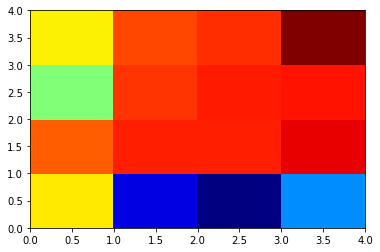

In [38]:
# Set color map to `plt.cm.jet`
ax=plt.axes()
pcolor=ax.pcolormesh(xx,yy,gds_res_mean_ts_rs,cmap=plt.cm.jet)

Text(0, 0.5, 'Y coordinate')

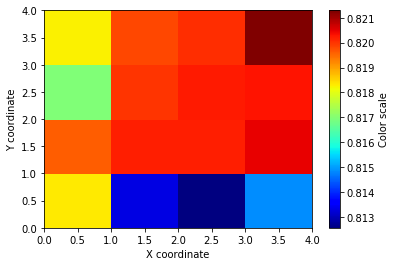

In [39]:
# Visualize pcolormesh
ax=plt.axes()
pcolor=ax.pcolormesh(xx,yy,gds_res_mean_ts_rs,cmap=plt.cm.jet)
plt.colorbar(pcolor, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [40]:
# Create a dataframe of the feature names and importance
gds_feat_imp=pd.DataFrame({'Features':features_response[:-1],'Importance':gds.best_estimator_.feature_importances_})
gds_feat_imp

,Features,Importance
0,LIMIT_BAL,0.059304
1,EDUCATION,0.012236
2,MARRIAGE,0.008203
3,AGE,0.043141
4,PAY_1,0.302206
5,BILL_AMT1,0.055482
6,BILL_AMT2,0.051545
7,BILL_AMT3,0.047886
8,BILL_AMT4,0.046656
9,BILL_AMT5,0.044069


In [41]:
# Sort values by importance
gds_feat_imp.sort_values(by='Importance',ascending=False)

,Features,Importance
4,PAY_1,0.302206
11,PAY_AMT1,0.060388
0,LIMIT_BAL,0.059304
5,BILL_AMT1,0.055482
12,PAY_AMT2,0.053012
6,BILL_AMT2,0.051545
7,BILL_AMT3,0.047886
13,PAY_AMT3,0.047419
8,BILL_AMT4,0.046656
10,BILL_AMT6,0.045360
